<a href="https://colab.research.google.com/github/plaban1981/Dockship/blob/main/Richter's_Predictor_Modeling_Earthquake_Damage_(1)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem description
We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

* 1 represents low damage
* 2 represents a medium amount of damage
* 3 represents almost complete destruction

## Evaluation Metrics
micro averaged F1 score

In [ ]:
!pip install catboost

     |████████████████████████████████| 65.7MB 98kB/s 


In [ ]:
!pip install yellowbrick

In [ ]:
!mkdir "/content/earthquake"

In [ ]:
from google.colab import files
files.upload()

Saving submission_format.csv to submission_format.csv


{'submission_format.csv': b'building_id,damage_grade\n300051,1\n99355,1\n890251,1\n745817,1\n421793,1\n871976,1\n691228,1\n896100,1\n343471,1\n766647,1\n800548,1\n652685,1\n590834,1\n612530,1\n535718,1\n269418,1\n281421,1\n797571,1\n216579,1\n81554,1\n132785,1\n976125,1\n851237,1\n322922,1\n786774,1\n922680,1\n134349,1\n551456,1\n194812,1\n520031,1\n765502,1\n517764,1\n174470,1\n395012,1\n159776,1\n62638,1\n65760,1\n761527,1\n37201,1\n853163,1\n562505,1\n349010,1\n780817,1\n179897,1\n845103,1\n171560,1\n586661,1\n84102,1\n610806,1\n269531,1\n3781,1\n127674,1\n820462,1\n955190,1\n405557,1\n143219,1\n360041,1\n378036,1\n613583,1\n992040,1\n849585,1\n491236,1\n847580,1\n229211,1\n173624,1\n642562,1\n86467,1\n684629,1\n304627,1\n255913,1\n861624,1\n367328,1\n13216,1\n838446,1\n981040,1\n335849,1\n823769,1\n666855,1\n398783,1\n829946,1\n326177,1\n359387,1\n924578,1\n712624,1\n946541,1\n373943,1\n865274,1\n522404,1\n841632,1\n649142,1\n332157,1\n722082,1\n279597,1\n107512,1\n26477,1\n138895,

In [ ]:
import shutil
shutil.move("/content/train_values.csv","/content/earthquake")

'/content/earthquake/train_values.csv'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
shutil.move("/content/submission_format.csv","/content/drive/MyDrive/ritcher_earthquake")

'/content/drive/MyDrive/ritcher_earthquake/submission_format.csv'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [ ]:
df = pd.concat([pd.read_csv(f,encoding='latin1', index_col='building_id') for f in glob.glob('/content/drive/MyDrive/ritcher_earthquake/earthquake/train*.csv')], axis=1)
df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
# remove index Name
df = df.rename_axis(None).reset_index()
df.drop('index',axis=1,inplace=True)
df.head()


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


## Summary Statistics


In [ ]:
df.describe(include='all')

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601,260601,260601,260601,260601,260601,260601,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,3,5,4,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,r,n,f,q,s,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216757,219196,182842,209619,165282,202090,250072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,NaN,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,NaN,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


## Visualize Labels

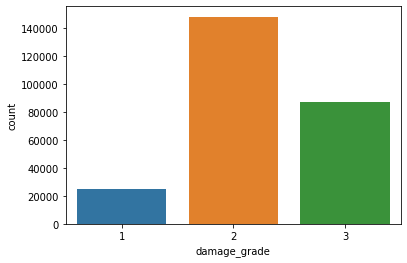

In [ ]:
sns.countplot(x='damage_grade',data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

## Numeric Features

In [ ]:
X = df.drop('damage_grade',axis=1)
Y = df['damage_grade']

In [ ]:
X.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

In [ ]:
Y.head()

0    3
1    2
2    3
3    2
4    3
Name: damage_grade, dtype: int64

In [ ]:
num_features = []
cat_features = []
for col in X.columns.tolist():
  if X[col].dtypes == 'O':
    cat_features.append(col)
  else:
    num_features.append(col)

In [ ]:
cat_features

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [ ]:
X[num_features].head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Catboost Classifier

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import *
from sklearn.model_selection import *

## Hyperparameter Tuning for CatboostClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gridParams = {
    'max_depth': [4,6,8,10,15,20],
    'num_boost_round': [1000,2000,2500,3000],
    'random_state' : [42,50,60,70,90]
    }
catboost = CatBoostClassifier(eval_metric='AUC',auto_class_weights='Balanced',verbose=0)
grid = RandomizedSearchCV(catboost, gridParams, verbose=2, cv=5, n_jobs=4)
# Run the grid
grid.fit(X, Y,cat_features = cat_features)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: ignored

## Applying Cross-Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        #model  = CatBoostClassifier(learning_rate = 0.04627007502666947, n_estimators =200, max_depth =3,random_state = 60)    
        model = CatBoostClassifier(max_depth=12,
                                   random_state=60,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=1000,verbose=0)
        model.fit(xtrain,ytrain,cat_features = cat_features)
            
        preds = model.predict(xtest)
        
        print(f1_score(ytest,preds,average='micro'))
        scores.append(f1_score(ytest,preds,average='micro'))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

Running 1 iteration
0.6973699357641154
0.6962701458173446
Running 2 iteration
0.6944919839448661


## Predictions on test data

In [ ]:
#read in test data
test_data = pd.read_csv("/content/test_values.csv", index_col='building_id')

test_data.head()

In [ ]:
test = test_data.copy()
# remove index Name
test = test.rename_axis(None).reset_index()
test.drop('index',axis=1,inplace=True)
print(test.head())

In [ ]:
#predict on test with hgb 
submission_pred = hgb_grid.predict(test)

In [ ]:
#create submission file
submission = pd.DataFrame(data=submission_pred, columns=['damage_grade']).set_index(test_data.index)

In [ ]:
submission = submission.reset_index()

In [ ]:
submission.to_csv("HistGradientClassifier.csv",index=False)

## **HistGradientClassifier**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_features = [0,1,2,3,4,5,6]
categorical_features = [7,8,9,10,11,12,13,25]
numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(OneHotEncoder())
Preprocessor = ColumnTransformer(
 transformers=[
 ('numeric_transformer', numeric_transformer, numeric_features),
 ('categorical_transformer', categorical_transformer, categorical_features)
 ])

In [ ]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting 
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
hgb_pipe = make_pipeline(Preprocessor,HistGradientBoostingClassifier())

In [ ]:
from sklearn.model_selection import GridSearchCV
#parameters to tune
parameters = {
 'histgradientboostingclassifier__max_iter': [1000,1200,1500],
 'histgradientboostingclassifier__learning_rate': [0.1],
 'histgradientboostingclassifier__max_depth' : [25, 50, 75],
 'histgradientboostingclassifier__l2_regularization': [1.5],
 'histgradientboostingclassifier__scoring': ['f1_micro'],
 'histgradientboostingclassifier__random_state' : [42,52,60,100],
 }
#instantiate the gridsearch
hgb_grid = GridSearchCV(hgb_pipe, parameters, n_jobs=5, cv=5, scoring='f1_micro',verbose=2, refit=True)
#fit on the grid 
hgb_grid.fit(X_train, y_train)
# Print the best parameters found
print(hgb_grid.best_params_)
# Print the best scores found
print()
print(hgb_grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 58.9min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed: 287.0min
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed: 342.4min finished


{'histgradientboostingclassifier__l2_regularization': 1.5, 'histgradientboostingclassifier__learning_rate': 0.1, 'histgradientboostingclassifier__max_depth': 25, 'histgradientboostingclassifier__max_iter': 1500, 'histgradientboostingclassifier__random_state': 42, 'histgradientboostingclassifier__scoring': 'f1_micro'}

0.7357300460475826


## Evaluate the model on validation data

In [ ]:
from sklearn.metrics import *
#Predict on X_test and print the confusion matrix
print()
y_pred_hgb = hgb_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred_hgb))
#Print the F1_score
print()
print(f1_score(y_test, y_pred_hgb, average='micro'))



[[ 2616  2332    77]
 [ 1188 25038  3426]
 [  109  6332 11003]]

0.7416780184570518


## Predictions on test data

In [ ]:
#read in test data
test_data = pd.read_csv("/content/test_values.csv", index_col='building_id')

test_data.head()


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = test_data.copy()
# remove index Name
test = test.rename_axis(None).reset_index()
test.drop('index',axis=1,inplace=True)
print(test.head())

   geo_level_1_id  ...  has_secondary_use_other
0              17  ...                        0
1               6  ...                        0
2              22  ...                        0
3              26  ...                        0
4              17  ...                        0

[5 rows x 38 columns]


In [ ]:
#predict on test with hgb 
submission_pred = hgb_grid.predict(test)


In [ ]:
#create submission file
submission = pd.DataFrame(data=submission_pred, columns=['damage_grade']).set_index(test_data.index)


In [ ]:
submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [ ]:
submission = submission.reset_index()

In [ ]:
submission.to_csv("HistGradientClassifier.csv",index=False)

**scored 0.7373 on 'Richter's Predictor: Modeling Earthquake Damage!'**

## TPOT Classifier

In [ ]:
!pip install tpot

     |████████████████████████████████| 92kB 6.0MB/s 
     |████████████████████████████████| 157.5MB 107kB/s 
     |████████████████████████████████| 163kB 56.1MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=1e118ab383eaf66819df089442279445a92dbb0c7805f789a5eb03188ac0a391
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from sklearn.preprocessing import StandardScaler
from tpot import TPOTClassifier
from sklearn.metrics import  *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cat_features

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [ ]:
X['land_surface_condition'].value_counts(ascending=True).index.tolist()

['o', 'n', 't']

In [ ]:
dict_1 = X['land_surface_condition'].value_counts().to_dict()

In [ ]:
def label_encode(dataframe,col_name):
  list1= dataframe[col].value_counts(ascending=True).index.tolist()
  dict1 = {k:v for v,k in enumerate(list1)} 
  return dict1


In [ ]:
for col in cat_features:
  label_dict = label_encode(X,col)
  print(label_dict)
  X[col] = X[col].map(label_dict)

{0: 0, 1: 1, 2: 2}
{'h': 0, 'i': 1, 'u': 2, 'w': 3, 'r': 4}
{'x': 0, 'q': 1, 'n': 2}
{'m': 0, 'z': 1, 'v': 2, 'x': 3, 'f': 4}
{'s': 0, 'j': 1, 'x': 2, 'q': 3}
{'o': 0, 'j': 1, 't': 2, 's': 3}
{'f': 0, 'n': 1, 'm': 2, 'o': 3, 'a': 4, 'c': 5, 's': 6, 'u': 7, 'q': 8, 'd': 9}
{'r': 0, 'w': 1, 'a': 2, 'v': 3}


In [ ]:
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,2,4,2,4,3,2,9,1,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,0,4,2,3,3,3,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,2,4,2,4,2,2,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,2,4,2,4,2,3,9,0,1,0,0,0,0,1,1,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,2,4,2,4,2,3,9,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [ ]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(X_scaled,Y.values,test_size=0.2,random_state=42)

In [ ]:
tpot = TPOTClassifier(
    generations=10,
    population_size=20,
    verbosity=2,
    scoring='accuracy',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(x_train, y_train)


Generation 1 - Current best internal CV score: 0.6793361473522641


In [ ]:
tpot_acc_score = accuracy_score(y_test, tpot.predict(x_test))
print(f'\nAUC score: {tpot_acc_score:.4f}')

## Best Model

In [ ]:
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print(f'{idx}. {transform}')

## Fitted Pipeline

In [ ]:
tpot.fitted_pipeline_

## Confusion Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cf = confusion_matrix(y_test, tpot.predict(x_test))
sns.heatmap(cf,annot=True,fmt=".2f")

## Prepare Test Data

In [ ]:
#read in test data
test_data = pd.read_csv("/content/test_values.csv", index_col='building_id')

test_data.head()

In [ ]:
test = test_data.copy()
# remove index Name
test = test.rename_axis(None).reset_index()
test.drop('index',axis=1,inplace=True)
print(test.head())

In [ ]:
X_test_scaled=sc.transform(test)
X_test_scaled

## Predictions

In [ ]:
y_test_pred = tpot.fitted_pipeline_.predict(X_test_scaled)

## AutoSklearn

In [ ]:
# To measure execution time of code
!pip install ipython-autotime
%load_ext autotime
#
# Autosklearn pre-requisite
!apt-get install swig -y
#
# Autosklearn pre-requisite
!pip install Cython numpy
# Automated library for machine learning model selection
!pip install auto-sklearn
# Autosklearn pre-requisite
!pip install scikit-learn==0.24.1
#
# Autosklearn pre-requisite
!python -m pip install "dask[distributed]" --upgrade

In [ ]:
import sklearn
import autosklearn.classification as classifier
from sklearn.model_selection import train_test_split

In [ ]:
# Input/independent variables
X = train_data.drop('class', axis = 1) # here we are dropping the class feature as this is the target and 'X' is input features, the changes are not
# made inplace as we have not used 'inplace = True'

y = train_data['class'] # Output/Dependent variable

In [ ]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state = 42,stratify=y)

In [ ]:
automlclassifier = classifier.AutoSklearnClassifier() # Default duration is 3600 seconds (1 hour)
automlclassifier.fit(X_train, y_train)

In [ ]:
# Print the final ensemble constructed by auto-sklearn
print(automlclassifier.show_models())

In [ ]:
print(automlclassifier.sprint_statistics())

In [ ]:
# import accuracy score from sklearn.metrics
from sklearn.metrics import accuracy_score,f1_score
# Generate predictions on the validation data
pred = automlclassifier.predict(X_val)
#Accuracy score
print('Accuracy  Score is: ', accuracy_score(y_val, pred))
# F1 Score 
print('Weighted F1 Score is: ', f1_score(y_val, pred, average='weighted'))

In [ ]:
# Make predictions
target = automlclassifier.predict(test)

## Save predictions

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission_autosklearn.csv', index = False)
files.download('submission_autosklearn.csv')

**scored 0.7357 on 'Richter's Predictor: Modeling Earthquake Damage!'**
